**Research plan**

[Part 0. Mobile Price Classification](#mpc) <br>
[Part 1. Feature and data explanation](#part1) <br>
[Part 2. Primary data analysis](#EDA) <br>
[Part 3. Primary visual data analysis](#part3) <br>
[Part 4. Insights and found dependencies](#part4) <br>
[Part 5. Metrics selection](#part5) <br>
[Part 6. Model selection](#part6) <br>
[Part 7. Data preprocessing](#part7) <br>
[Part 8. Cross-validation and adjustment of model hyperparameters](#part8) <br>
[Part 9. Creation of new features and description of this process](#part9) <br>
[Part 10. Plotting training and validation curves](#part10) <br>
[Part 11. Prediction for test or hold-out samples](#part11)<br>
[Part 12. Conclusions](#part12)<br>
[Bonus Part. Clustering](#bonus)<br>

# <center> Mobile Price Classification <a id='mpc'></a>
<center> Автор: Трефилов Андрей

Oldi zdes'?
<img src="https://habrastorage.org/webt/xp/br/v9/xpbrv9am-knejmbih1h9b7ndk20.jpeg" />

# Part 1. Feature and data explanation <a id='part1'></a>

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. 

In this project we do have to predict  price range indicating how high the price is.

Download dataset from [Kaggle page](https://www.kaggle.com/iabhishekofficial/mobile-price-classification)
<br>
Dataset contain train (with target variable)  and test (without target variable) samples.
<br>
For the <span style="color:red">train</span> sample, we will solve the <span style="color:red">multiclass classification</span> problem with 4 class, and for the <span style="color:blue">test</span>  sample we will solve the <span style="color:blue">clustering</span>  problem.

### The dataset has the following features (copied from Kaggle):
Every object - it is a unique mobile phone.
- **battery_power** - Total energy a battery can store in one time measured in mAh (quantitative);
- **blue** - Has bluetooth or not (binary);
- **clock_speed** - speed at which microprocessor executes instructions (quantitative);
- **dual_sim** - Has dual sim support or not (binary);
- **fc** - Front Camera mega pixels (categorical);
- **four_g** - Has 4G or not (binary);
- **int_memory** - Internal Memory in Gigabytes (quantitative);
- **m_dep** - Mobile Depth in cm (categorical); 
- **mobile_wt** - Weight of mobile phone (quantitative);
- **n_cores** - Number of cores of processor (categorical);
- **pc** - Primary Camera mega pixels (categorical);
- **px_height** - Pixel Resolution Heigh (quantitative);
- **px_width** - Pixel Resolution Width (quantitative);
- **ram** - Random Access Memory in Megabytes (quantitative);
- **sc_h** - Screen Height of mobile in cm (categorical);
- **sc_w** - Screen Width of mobile in cm (categorical);
- **talk_time** - longest time that a single battery charge will last when you are (quantitative);
- **three_g** - Has 3G or not (binary);
- **touch_screen** - Has touch screen or not (binary);
- **wifi** - Has wifi or not (binary);
<br>

- **price_range** - This is the `target variable` with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). Contain only the in train sample

# Part 2. Primary data analysis <a id='EDA'></a>

Importing libraries:

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
#%config InlineBackend.figure_format = 'svg'
import warnings
warnings.simplefilter('ignore')
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, StratifiedKFold, validation_curve
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,\
                            f1_score, make_scorer, classification_report, confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 21)
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from tqdm import tqdm_notebook
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Let`s look at data:

In [2]:
data_train = pd.read_csv('../data/mobile/train.csv')
data_test = pd.read_csv('../data/mobile/test.csv')
data_test.drop(columns='id', inplace=True)

In [4]:
data_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [5]:
data_test.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

In our samples we have quantitative features, categorical and binary features

<br>
And our samples haven't missing items in the data:

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [25]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
battery_power    1000 non-null int64
blue             1000 non-null int64
clock_speed      1000 non-null float64
dual_sim         1000 non-null int64
fc               1000 non-null int64
four_g           1000 non-null int64
int_memory       1000 non-null int64
m_dep            1000 non-null float64
mobile_wt        1000 non-null int64
n_cores          1000 non-null int64
pc               1000 non-null int64
px_height        1000 non-null int64
px_width         1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             1000 non-null int64
talk_time        1000 non-null int64
three_g          1000 non-null int64
touch_screen     1000 non-null int64
wifi             1000 non-null int64
dtypes: float64(2), int64(18)
memory usage: 156.3 KB


Look at the distribution of target feature:

In [39]:
data_train.groupby('price_range')[['price_range']].count().rename(columns={'price_range': 'count'}).T

price_range    0    1    2    3
count        500  500  500  500

Ok, it is a toy dataset..)We see that the target variable is uniform distributed

# Part 3. Primary visual data analysis <a id='part3'></a>

Let's draw plot of correlation matrix (before this, drop a boolean variables):

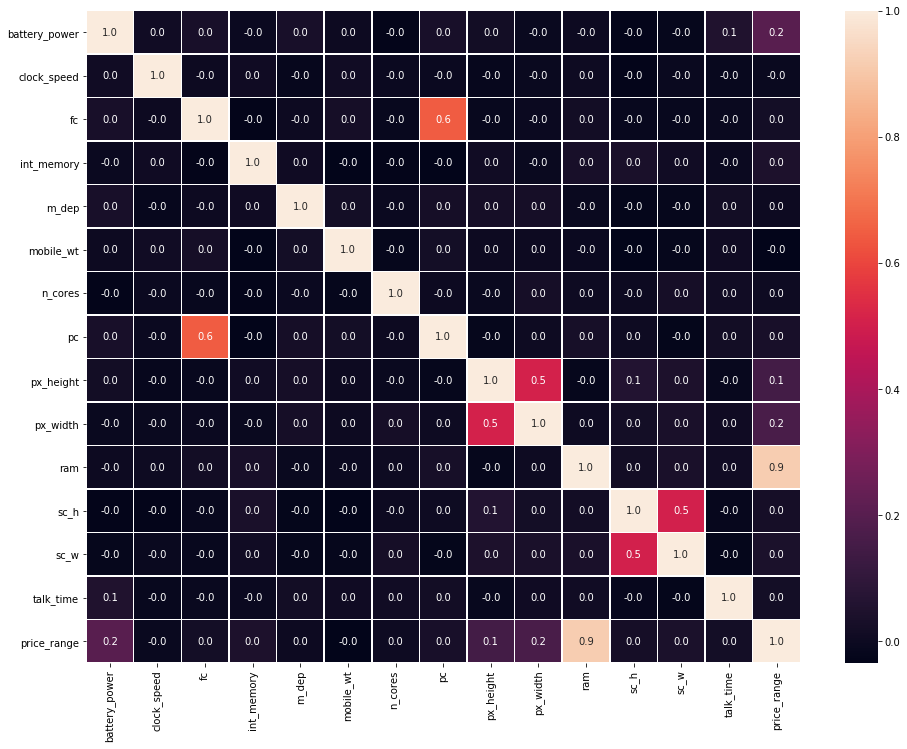

In [6]:
corr_matrix = data_train.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], axis=1).corr()
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=0.5);

Ok, we see that there is a correlation between the `target` variable and four features: `battery_power`, `px_height`, `px_width` and `ram`.


And some variables are correlated with each other: `pc` and `fc` (photo modules), `sc_w` and `sc_h` (screen width and heght), `px_width` and `px_height` (pixel resolution heigh and width).

Draw plot of distribution of target variable:

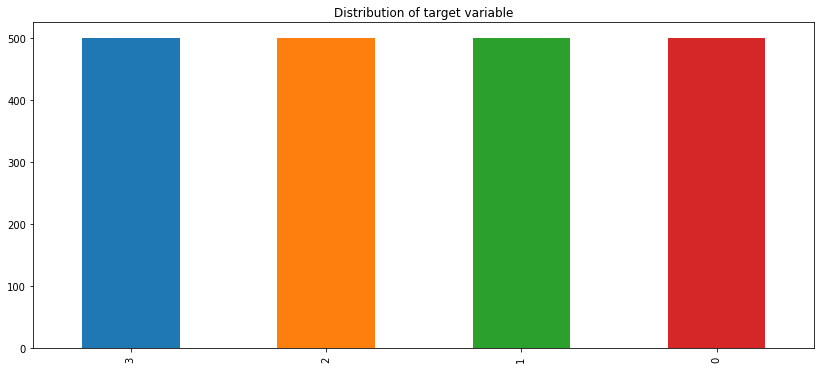

In [42]:
data_train['price_range'].value_counts().plot(kind='bar',figsize=(14,6))
plt.title('Distribution of target variable');

Ok, we again see that the target variable is uniform distributed

Look at the distribution of quantitative features:

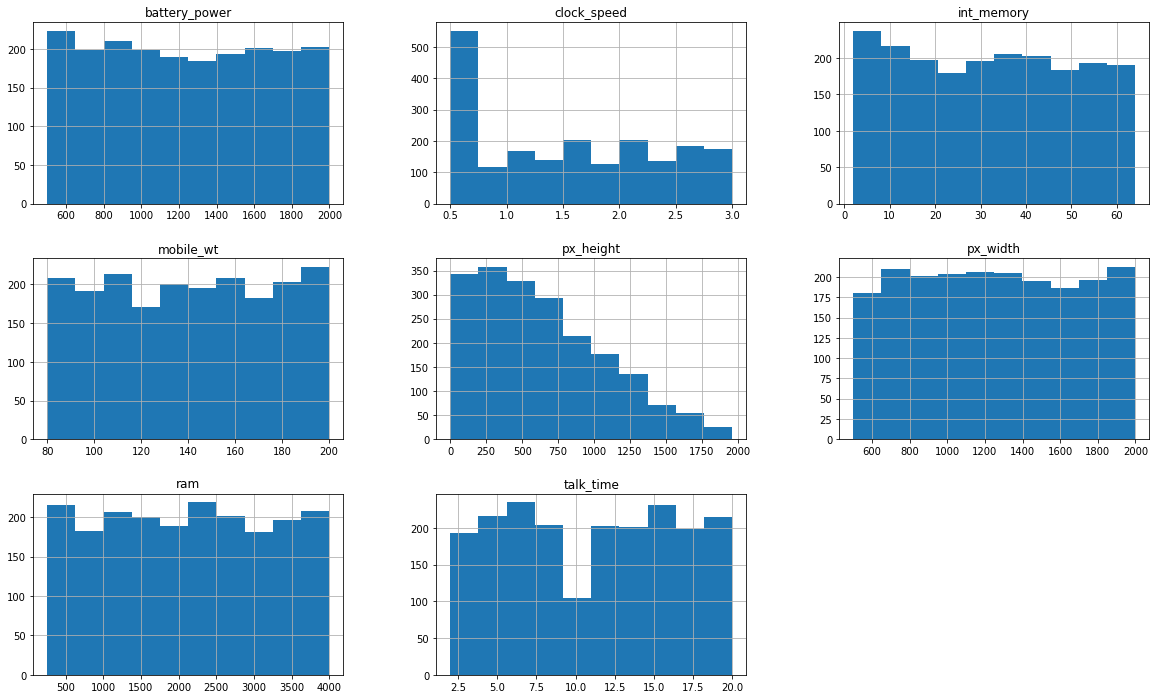

In [8]:
features = list(data_train.drop(['price_range', 'blue', 'dual_sim',\
                                     'four_g', 'fc', 'm_dep', 'n_cores',\
                                     'pc', 'sc_h', 'sc_w', 'three_g', 'wifi', 'touch_screen'], axis=1).columns)
data_train[features].hist(figsize=(20,12));

Let's look at the interaction of different features among themselves with `sns.pairplot`:

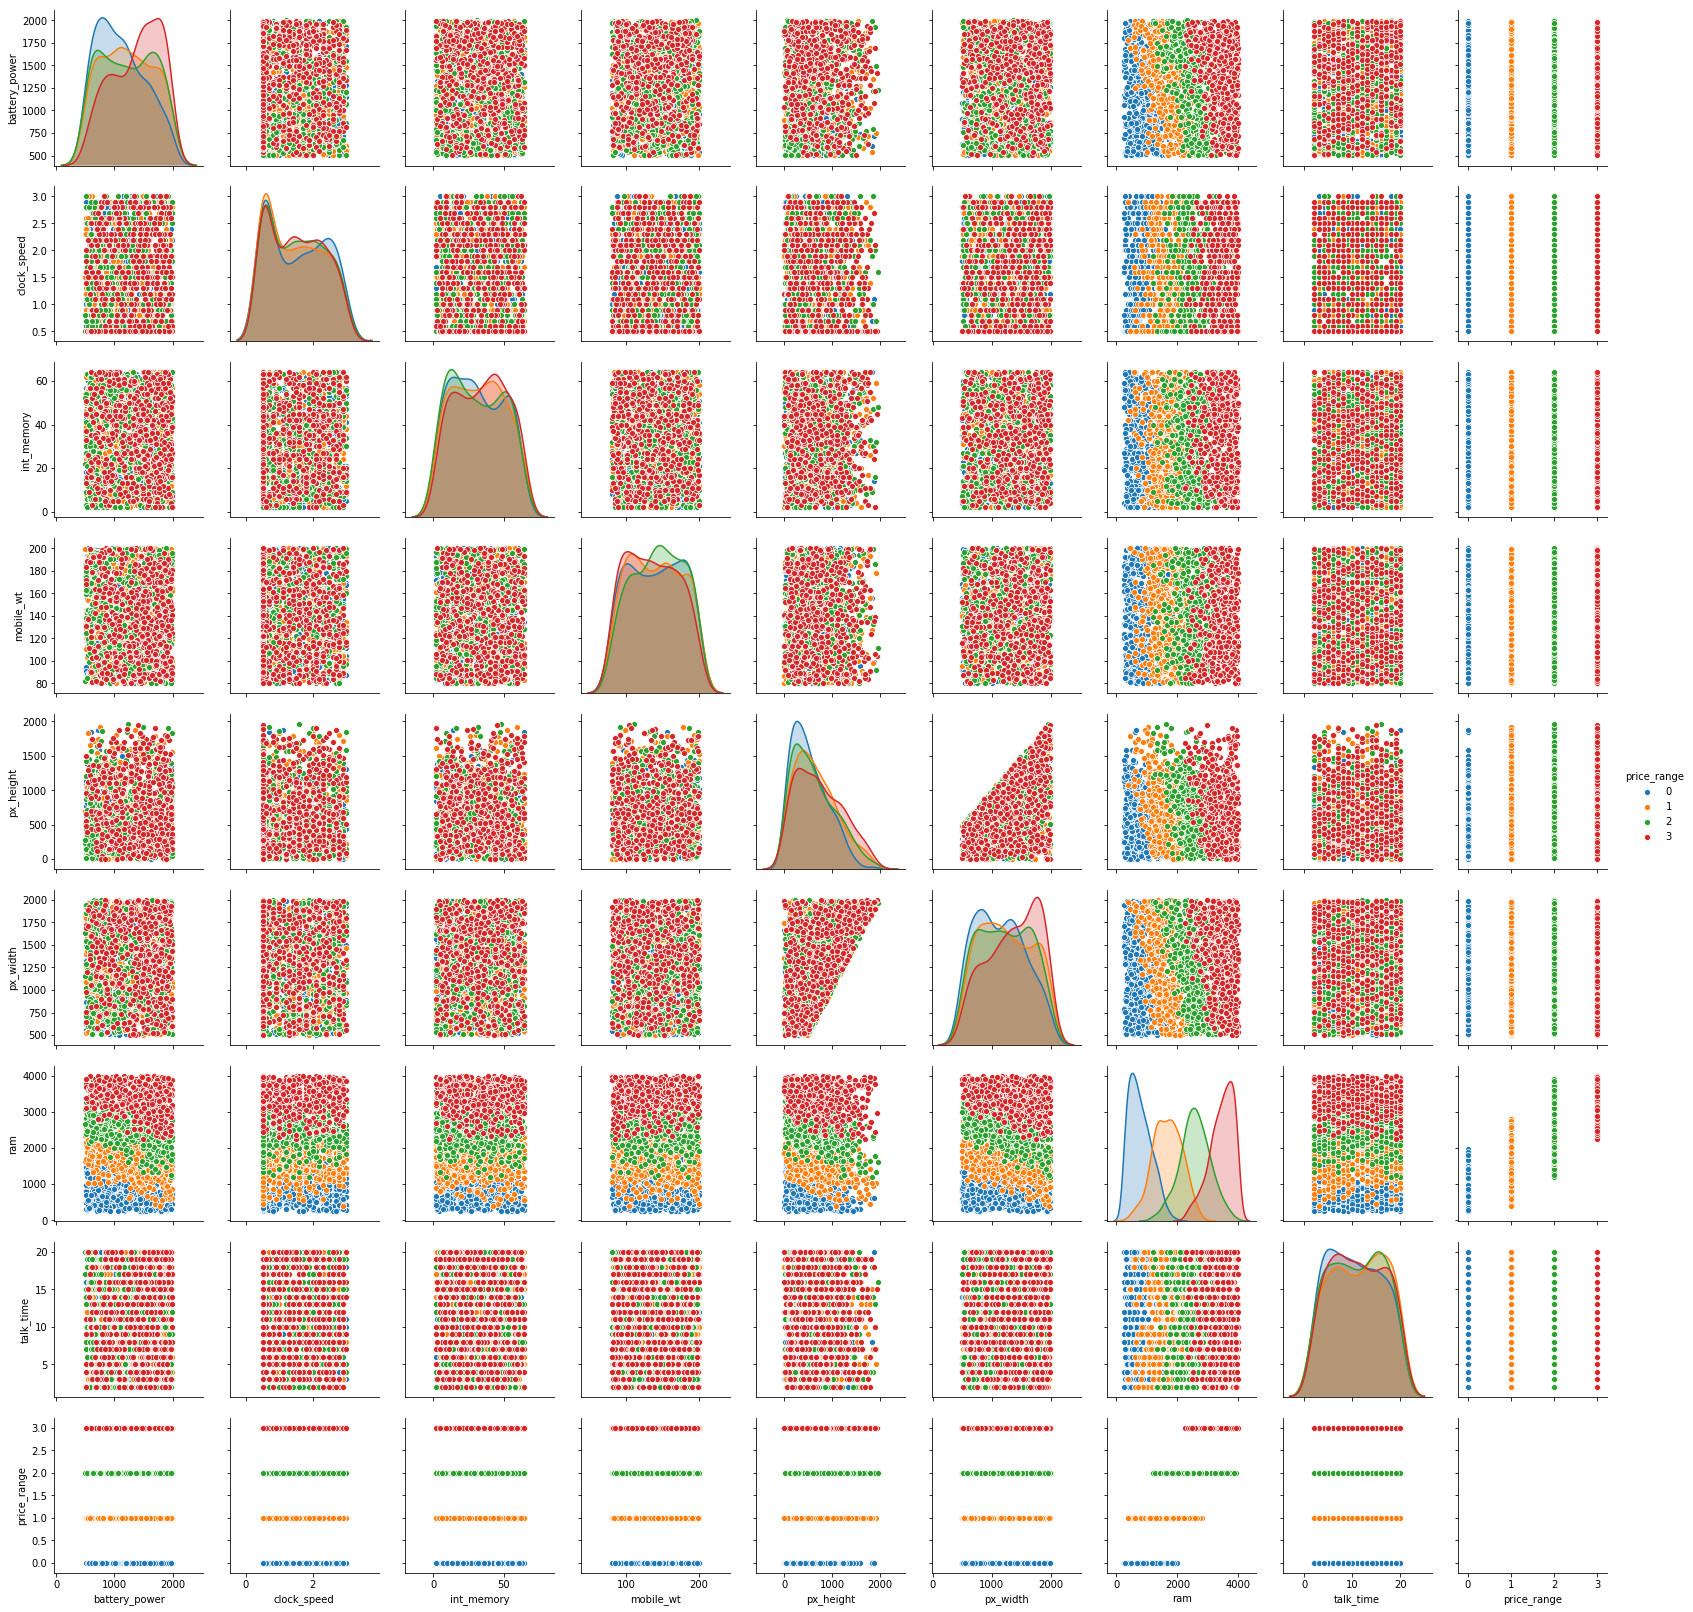

In [9]:
sns.pairplot(data_train[features + ['price_range']], hue='price_range');

We see that the `ram` feature of a good separates our objects by different price categories.

Construct the `sns.boxplot`, describe the distribution statistics of quantitative traits:

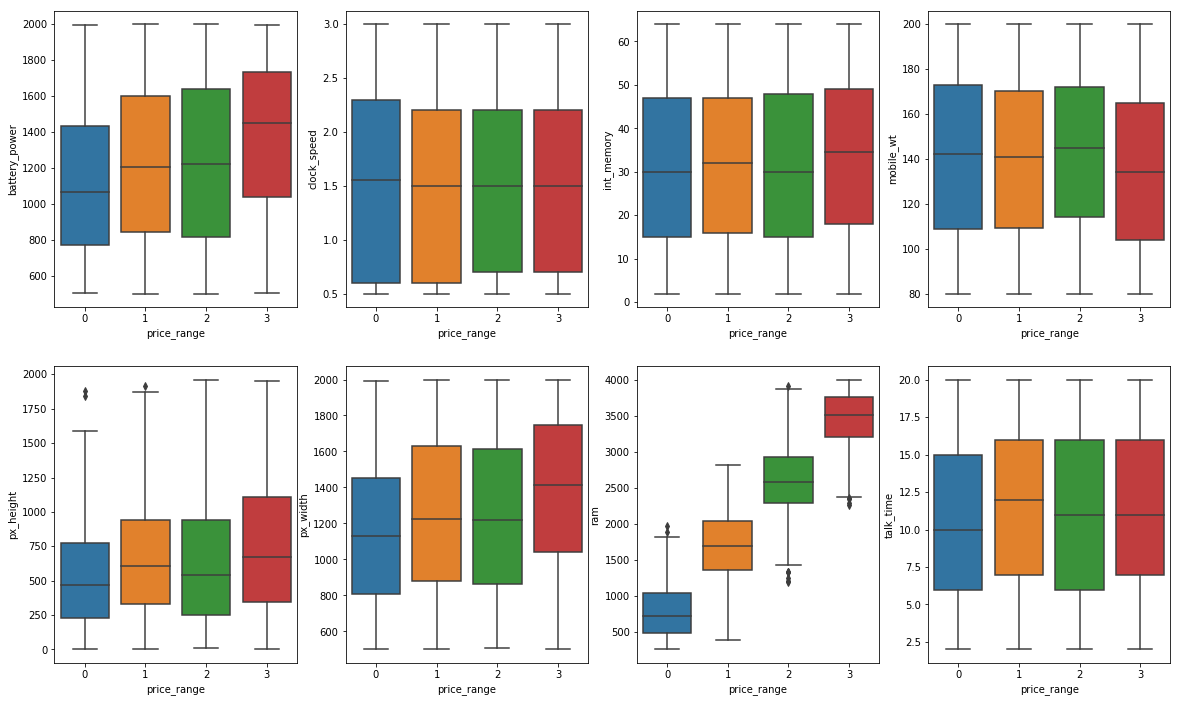

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

for idx, feat in  enumerate(features):
    sns.boxplot(x='price_range', y=feat, data=data_train, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].set_xlabel('price_range')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

We see that it is better to difference our price categories the following features: `battery_power`, `px_height`, `px_width` и `ram`. As well as the plot of the correlation matrix.

Ok, let's plot the distribution for `sc_w` - categorical feature:

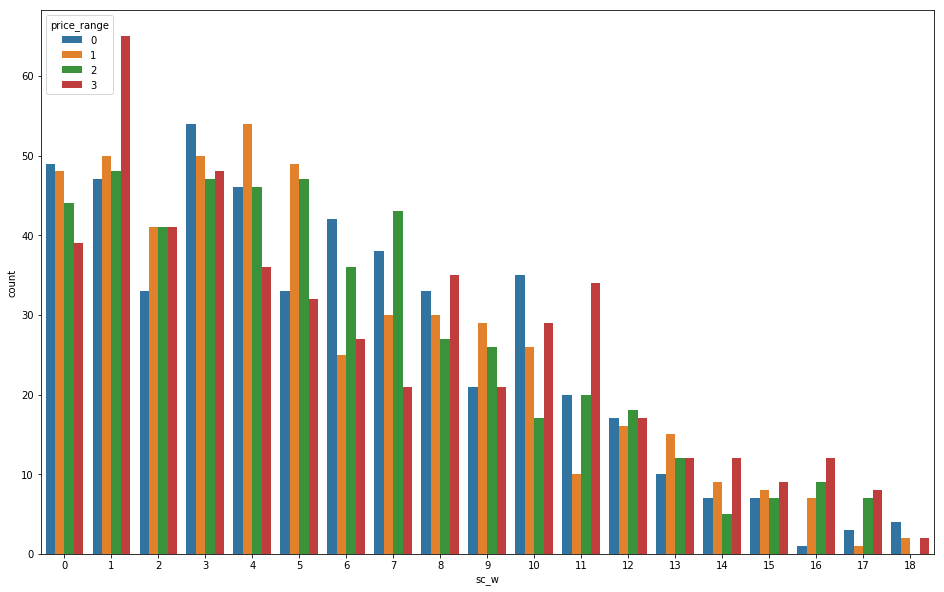

In [45]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(x='sc_w', hue='price_range', data=data_train);

Wee see that count of our object decreases with increasing width

plot the distribution for `sc_w` - categorical feature:

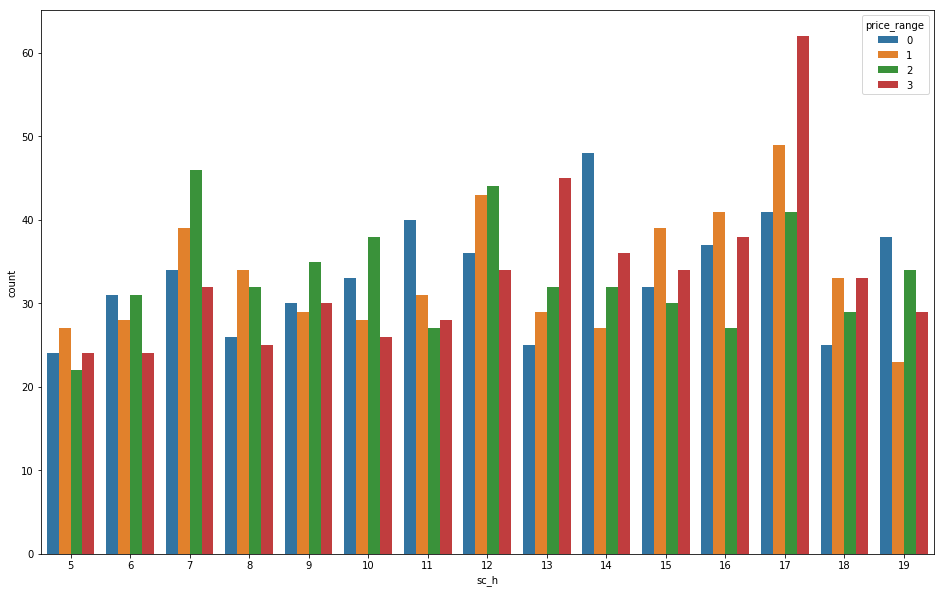

In [46]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(x='sc_h', hue='price_range', data=data_train);

Now let's look at the connection of binary features of `blue`, `dual_sim`, `four_g` and `three_g` with our target `price_range`.

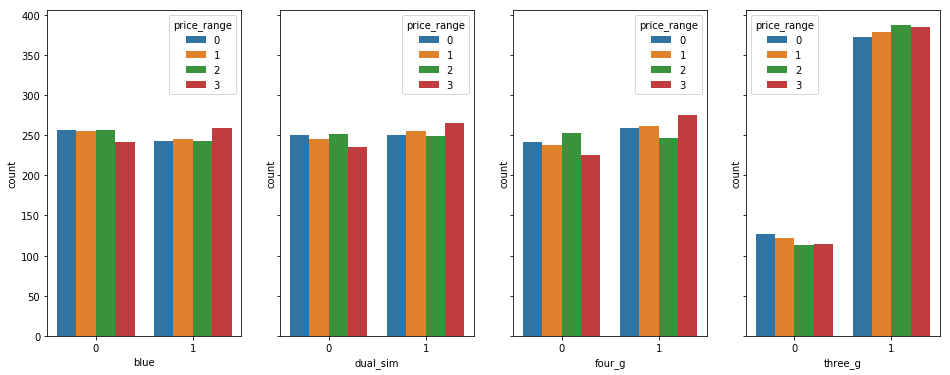

In [13]:
_, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))

sns.countplot(x='blue', hue='price_range', data=data_train, ax=axes[0]);
sns.countplot(x='dual_sim', hue='price_range', data=data_train, ax=axes[1]);
sns.countplot(x='four_g', hue='price_range', data=data_train, ax=axes[2]);
sns.countplot(x='three_g', hue='price_range', data=data_train, ax=axes[3]);

All about the same, but count objects with 3G more than without.

Now, let's build a t-SNE representation:

In [47]:
X = data_train.drop('price_range', axis=1)
y = data_train.price_range

In [48]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X)

Wall time: 14.4 s


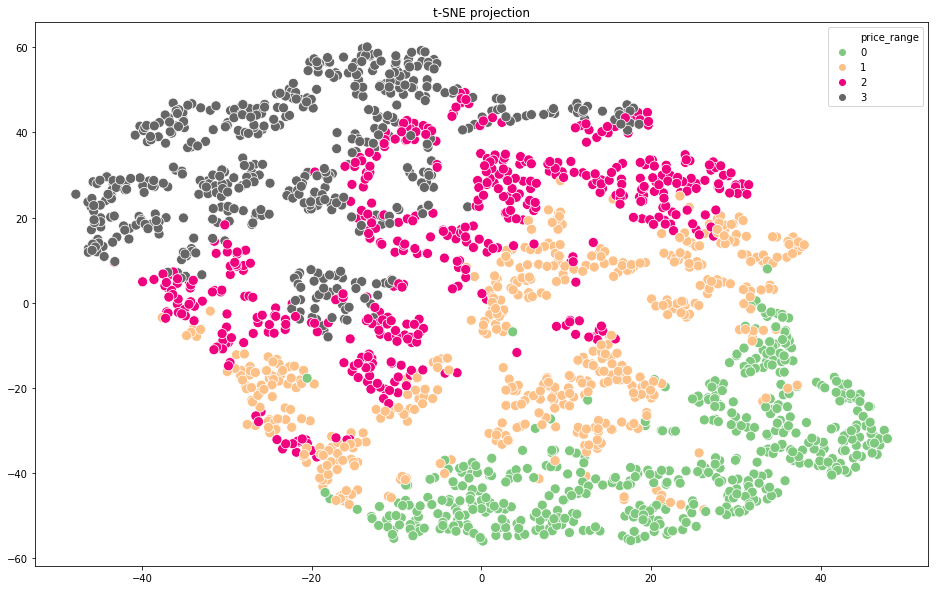

In [51]:
fig, ax = plt.subplots(figsize=(16,10))
cmap = sns.cubehelix_palette(dark=.1, light=.8, as_cmap=True)
sns.scatterplot(tsne_representation[:, 0], tsne_representation[:, 1],\
                            s=100, hue=data_train['price_range'], palette="Accent");
plt.title('t-SNE projection');

We see that the object is well distinguished.

Let's look at another representation of the `scaled data` colored by binary features:

In [52]:
%%time
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne2 = TSNE(random_state=17)
tsne_representation2 = tsne2.fit_transform(X_scaled)

Wall time: 17.8 s


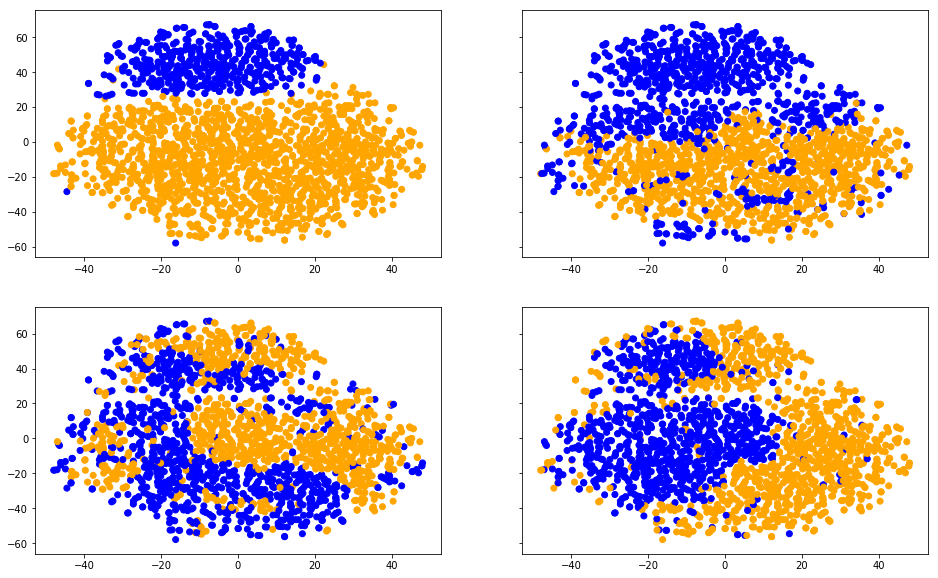

In [53]:
_, axes = plt.subplots(2, 2, sharey=True, figsize=(16,10))

axes[0][0].scatter(tsne_representation2[:, 0], tsne_representation2[:, 1], 
            c=data_train['three_g'].map({0: 'blue', 1: 'orange'}));
axes[0][1].scatter(tsne_representation2[:, 0], tsne_representation2[:, 1], 
            c=data_train['four_g'].map({0: 'blue', 1: 'orange'}));
axes[1][0].scatter(tsne_representation2[:, 0], tsne_representation2[:, 1], 
            c=data_train['blue'].map({0: 'blue', 1: 'orange'}));
axes[1][1].scatter(tsne_representation2[:, 0], tsne_representation2[:, 1], 
            c=data_train['dual_sim'].map({0: 'blue', 1: 'orange'}));

Ok, we see that the binary features are a bunch).

# Part 4. Insights and found dependencies <a id='part4'></a>

Combining the observation from the previous paragraphs, the following is to be denoted:<ul>
<li>The dataset under analysis don`t contain omissions. That's no wonder: we have a toy dataset.</li>
<li>The distribution of the target feature, <b>price_range</b> is uniform distribution, so this is again because we have toy data.</li>
<li>The <b>pc</b> and <b>fc</b> columns to be interconnected features, as well as <b>sc_w</b> and <b>sc_h</b>, and <b>px_width</b> and <b>px_height</b> interconnected to. This is understandable, because the screen must be of a certain shape, basically the phone screens are similar to each other.</li>
<li>The some features have a good correlation with the target variable <b>price_range</b>, such as  <b>battery_power</b>, <b>px_height</b>, <b>px_width</b>, <b>ram</b>.</li>
<li>On the sns.pairplot <b>ram</b> feature and the <b>t-SNE</b> representation we see that the objects are well separated from each other, and separated linearly, respectively, assume that models that work well with linearly separable objects, and those models that take into account distance, will be very useful here </li>
<li>For the next part of creating features, there are some baselines that we can come up with.</li>
</ul>

# Part 5. Metrics selection <a id='part5'></a>

We have a problem of multi-class classification. It is necessary to predict the class itself, not the probability of belonging to the class, so we use the metrics from the classification problem, namely `accuracy`, `precision`, `recall  `, `f1`. The basic metric we will have is `accuracy` but we will use `classification_report` to estimate other metrics.

We can use `accuracy`, because we have uniform distribution of target variable.

$$\mathcal accuracy = \dfrac{1}{l}\sum_{i=1}^l [a(x_{i})=y_{i}]$$

We will also consider the `confusion matrix`, columns `i` - true class label, line `j` - assessment of class membership from our algorithm, where $q_{ij}$: 

$$\mathcal q_{ij} = \sum_{m=1}^l [a(x_{m})=i][y_{m}=j]$$

# Part 6. Model selection <a id='part6'></a>

So, we have a problem of multi-class classification, and as we already know our task linearly separable.
That's why we can use `LogisticRegression`. Well, we have four classes, and to solve this problem is well suited `OneVsOneClassifier` - a model that trains K(K-1) models for each pair of classes.

With a problem of multi-class classification the following models also work well by default:

- KNeighborsClassifier
- RandomForestClassifier
- SVC

# Part 7. Data preprocessing <a id='part7'></a>

We divide our sample into a matrix of features and a vector of answers:

In [58]:
X = data_train.drop('price_range', axis=1)
y = data_train.price_range

Let's make a split into a train sample and hold-out sample:

In [59]:
X_train_part, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=17)

Some models should not be scaled, but for others it is necessary:

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_part_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_scaled, y,\
                                                        test_size=0.3, stratify=y, random_state=17)

# Part 8. Cross-validation and adjustment of model hyperparameters <a id='part8'></a>

## `LogisticRegression` with scaled features:

In [61]:
lr = LogisticRegression(random_state=17)
lr.fit(X_train_part_scaled, y_train);
print(accuracy_score(y_valid, lr.predict(X_valid_scaled)))
print(classification_report(y_valid, lr.predict(X_valid_scaled)))

0.8166666666666667
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       150
           1       0.70      0.68      0.69       150
           2       0.74      0.59      0.66       150
           3       0.89      1.00      0.94       150

   micro avg       0.82      0.82      0.82       600
   macro avg       0.81      0.82      0.81       600
weighted avg       0.81      0.82      0.81       600



#### Confusion matrix for `LogisticRegression`:

In [62]:
tab = pd.crosstab(y_valid, lr.predict(X_valid_scaled), margins=True)
tab.index = ['low cost', 'medium cost', 'high cost', 'very high cost', 'all']
tab.columns = tab.index
tab

low cost  medium cost  high cost  very high cost  all
low cost             149            1          0               0  150
medium cost           16          102         32               0  150
high cost              0           43         89              18  150
very high cost         0            0          0             150  150
all                  165          146        121             168  600

For `GridSearchCV` we choose the parameters of `LogisticRegression`: <b>C</b> - Inverse of regularization strength, smaller values specify stronger regularization. <b>solver</b> - Algorithm to use in the optimization problem. <b>class_weight</b> - Weights associated with classes in the form {class_label: weight}. 

In [70]:
params = {'C': np.logspace(-5, 5, 11),
          'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'class_weight' : ['balanced', None]}


lr_grid = GridSearchCV(lr, params, n_jobs=-1, cv=5, scoring='accuracy', verbose=1)
lr_grid.fit(X_train_part_scaled, y_train);

Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:   22.8s finished


In [71]:
print(accuracy_score(y_valid, lr_grid.predict(X_valid_scaled)))
print(classification_report(y_valid, lr_grid.predict(X_valid_scaled)))
lr_grid.best_params_, lr_grid.best_score_

0.875
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.75      0.78      0.76       150
           2       0.78      0.75      0.76       150
           3       1.00      0.99      0.99       150

   micro avg       0.88      0.88      0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



({'C': 100.0, 'class_weight': 'balanced', 'solver': 'newton-cg'}, 0.885)

Nice, after `GridSearchCV` we see that score increase.

#### Confusion matrix for `LogisticRegression` after `GridSearchCV`:

In [72]:
tab = pd.crosstab(y_valid, lr_grid.predict(X_valid_scaled), margins=True)
tab.index = ['low cost', 'medium cost', 'high cost', 'very high cost', 'all']
tab.columns = tab.index
tab

low cost  medium cost  high cost  very high cost  all
low cost             148            2          0               0  150
medium cost            4          117         29               0  150
high cost              0           38        112               0  150
very high cost         0            0          2             148  150
all                  152          157        143             148  600

## `KNeighborsClassifier` with unscaled features:

In [74]:
kneigh = KNeighborsClassifier()
kneigh.fit(X_train_part, y_train) 

print(accuracy_score(y_valid, kneigh.predict(X_valid)))
print(classification_report(y_valid, kneigh.predict(X_valid)))

0.9266666666666666
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.92      0.92      0.92       150
           2       0.86      0.91      0.89       150
           3       0.96      0.90      0.93       150

   micro avg       0.93      0.93      0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



#### Confusion matrix for `KNeighborsClassifier`:

In [76]:
tab = pd.crosstab(y_valid, kneigh.predict(X_valid), margins=True)
tab.index = ['low cost', 'medium cost', 'high cost', 'very high cost', 'all']
tab.columns = tab.index
tab

low cost  medium cost  high cost  very high cost  all
low cost             146            4          0               0  150
medium cost            5          138          7               0  150
high cost              0            8        137               5  150
very high cost         0            0         15             135  150
all                  151          150        159             140  600

## `OneVsOneClassifier` with scaled features:

In [80]:
clf = OneVsOneClassifier(LogisticRegression(random_state=17))
clf.fit(X_train_part_scaled, y_train);

print(accuracy_score(y_valid, clf.predict(X_valid_scaled)))
print(classification_report(y_valid, clf.predict(X_valid_scaled)))

0.9666666666666667
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.94      0.95      0.94       150
           2       0.97      0.94      0.95       150
           3       0.99      0.99      0.99       150

   micro avg       0.97      0.97      0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



#### Doing `GridSearchCV` for `OneVsOneClassifier` with `LogisticRegression`:

In [106]:
params = {'estimator__C': np.logspace(-5, 5, 11),
          'estimator__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'estimator__class_weight' : ['balanced', None]}


clf_grid = GridSearchCV(clf, params, n_jobs=-1, cv=5, scoring='accuracy', verbose=1)
clf_grid.fit(X_train_part_scaled, y_train);

Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:   27.4s finished


In [107]:
print(accuracy_score(y_valid, clf_grid.predict(X_valid_scaled)))
print(classification_report(y_valid, clf_grid.predict(X_valid_scaled)))
clf_grid.best_params_, clf_grid.best_score_

0.9766666666666667
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.97      0.95      0.96       150
           2       0.96      0.98      0.97       150
           3       1.00      0.98      0.99       150

   micro avg       0.98      0.98      0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



({'estimator__C': 100.0,
  'estimator__class_weight': 'balanced',
  'estimator__solver': 'liblinear'},
 0.9685714285714285)

#### Confusion matrix for `OneVsOneClassifier` after `GridSearchCV`:

In [83]:
tab = pd.crosstab(y_valid, clf_grid.predict(X_valid_scaled), margins=True)
tab.index = ['low cost', 'medium cost', 'high cost', 'very high cost', 'all']
tab.columns = tab.index
tab

low cost  medium cost  high cost  very high cost  all
low cost             149            1          0               0  150
medium cost            4          143          3               0  150
high cost              0            3        147               0  150
very high cost         0            0          3             147  150
all                  153          147        153             147  600

For this task `OneVsOneClassifier` very good classifier!

## `RandomForestClassifier` with unscaled features:

In [95]:
rf_clf = RandomForestClassifier(random_state=17)
rf_clf.fit(X_train_part, y_train) 
print(accuracy_score(y_valid, rf_clf.predict(X_valid)))
print(classification_report(y_valid, rf_clf.predict(X_valid)))
#print(confusion_matrix(y_valid, rf_clf.predict(X_valid)))

0.7933333333333333
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       150
           1       0.72      0.68      0.70       150
           2       0.69      0.74      0.71       150
           3       0.93      0.81      0.87       150

   micro avg       0.79      0.79      0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



#### Let's see `feature_importances_ ` for `RandomForestClassifier`:

In [149]:
pd.DataFrame({'feat': X_train_part.columns,
              'coef': np.abs(rf_clf.feature_importances_).flatten().tolist()}).\
                                        sort_values(by='coef', ascending=False).head()

feat      coef
13            ram  0.461521
0   battery_power  0.077557
11      px_height  0.056996
12       px_width  0.055621
6      int_memory  0.042461

#### No wonder the correlation matrix told us that already.

#### Confusion matrix for `RandomForestClassifier`:

In [90]:
tab = pd.crosstab(y_valid, rf_clf.predict(X_valid), margins=True)
tab.index = ['low cost', 'medium cost', 'high cost', 'very high cost', 'all']
tab.columns = tab.index
tab

low cost  medium cost  high cost  very high cost  all
low cost             141            9          0               0  150
medium cost           25          102         23               0  150
high cost              0           30        111               9  150
very high cost         0            1         27             122  150
all                  166          142        161             131  600

## `SVC` with unscaled features:

In [98]:
svc = SVC(kernel='linear', probability=True, random_state=17)
svc.fit(X_train_part, y_train);

print(accuracy_score(y_valid, svc.predict(X_valid)))
print(classification_report(y_valid, svc.predict(X_valid)))

0.9766666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.98      0.97      0.97       150
           2       0.96      0.98      0.97       150
           3       0.99      0.97      0.98       150

   micro avg       0.98      0.98      0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
svc = SVC(kernel='linear', probability=True, random_state=17)
svc.fit(X_train_part, y_train);

print(accuracy_score(y_valid, svc.predict(X_valid)))
print(classification_report(y_valid, svc.predict(X_valid)))

#### Doing `GridSearchCV` for `SVC`:

In [131]:
%%time
params_svc = {'C': np.logspace(-1, 1, 3),
              'decision_function_shape': ['ovr', 'ovo'],
              'class_weight' : ['balanced', None]}


svc_grid = GridSearchCV(svc, params_svc, n_jobs=-1, cv=3, scoring='accuracy', verbose=1)
svc_grid.fit(X_train_part, y_train);

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.1min finished


Wall time: 3min 13s


In [132]:
print(accuracy_score(y_valid, svc_grid.predict(X_valid)))
print(classification_report(y_valid, svc_grid.predict(X_valid)))
svc_grid.best_params_, svc_grid.best_score_

0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.98      0.97      0.97       150
           2       0.96      0.99      0.98       150
           3       1.00      0.97      0.99       150

   micro avg       0.98      0.98      0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



({'C': 0.1, 'class_weight': 'balanced', 'decision_function_shape': 'ovr'},
 0.9664285714285714)

#### Confusion matrix for `SVC` after `GridSearchCV`:

In [133]:
tab = pd.crosstab(y_valid, svc_grid.predict(X_valid), margins=True)
tab.index = ['low cost', 'medium cost', 'high cost', 'very high cost', 'all']
tab.columns = tab.index
tab

low cost  medium cost  high cost  very high cost  all
low cost             148            2          0               0  150
medium cost            3          145          2               0  150
high cost              0            1        149               0  150
very high cost         0            0          4             146  150
all                  151          148        155             146  600

### We have 2 models with amazing score - `OneVsOneClassifier` with `LogisticRegression` (scaled features), and `SVC` (unscaled features), with `accuracy = 0.9766` and `accuracy = 0.98` after `GridSearchCV` respectively!

# Part 9. Creation of new features and description of this process <a id='part9'></a>

The `inch` (abbreviation: in or ″) is a unit of length in the (British) imperial and United States customary systems of measurement. It is equal to ​1⁄36 yard or ​1⁄12 of a foot. Derived from the Roman uncia ("twelfth"), the word inch is also sometimes used to translate similar units in other measurement systems, usually understood as deriving from the width of the human thumb. Standards for the exact length of an inch have varied in the past, but since the adoption of the international yard during the 1950s and 1960s it has been based on the metric system and defined as exactly <b>2.54 cm</b>. 

Pixels per inch (`ppi`) or pixels per centimeter (ppcm) are measurements of the pixel density (resolution) of an electronic image device, such as a computer monitor or television display, or image digitizing device such as a camera or image scanner. Horizontal and vertical density are usually the same, as most devices have square pixels, but differ on devices that have non-square pixels. 

So, i think `ppi` it is a good feature, because, than the larger the value, the sharper the image.

Let's check this.

In [150]:
data_train2 = data_train.copy()
data_train2['inch'] = (np.sqrt(data_train2['sc_h']**2 + data_train2['sc_w']**2)/2.54).astype('int')
data_train2['ppi'] = np.sqrt(data_train2['px_width']**2 + data_train2['px_height']**2)/data_train2['inch']

Also make a feature that is based on the current modern phones:

In [151]:
data_train2['top'] = ((data_train2['touch_screen'] ==1)|\
                              (data_train2['ppi'] >=500)&\
                              (data_train2['inch'] >=5)&\
                              (data_train2['four_g'] ==1)|\
                              (data_train2['blue'] ==1)|\
                              (data_train2['int_memory'] >=36)|\
                              (data_train2['ram'] >=2600)).astype('int64')
data_train2['top'].value_counts()       

1    1825
0     175
Name: top, dtype: int64

Ok, let's check these features on our models:

For `SVC` unscaled matrix features:

In [152]:
X_train2, y2 = data_train2.drop(['price_range','inch'], axis=1), data_train2['price_range']
X_train_part2, X_valid2, y_train2, y_valid2 = train_test_split\
                            (X_train2, y2, test_size=.3, stratify=y2, random_state=17)

In [158]:
svc2 = SVC(kernel='linear', probability=True, random_state=17)
svc2.fit(X_train_part2, y_train2);

print(accuracy_score(y_valid2, svc2.predict(X_valid2)))
print(classification_report(y_valid2, svc2.predict(X_valid2)))

0.9783333333333334
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.98      0.97      0.97       150
           2       0.96      0.99      0.97       150
           3       0.99      0.97      0.98       150

   micro avg       0.98      0.98      0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [159]:
%%time
params_svc2 = {'C': np.logspace(-1, 1, 3),
              'decision_function_shape': ['ovr', 'ovo'],
              'class_weight' : ['balanced', None]}


svc_grid2 = GridSearchCV(svc2, params_svc2, n_jobs=-1, cv=3, scoring='accuracy', verbose=1)
svc_grid2.fit(X_train_part2, y_train2);

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.1min finished


Wall time: 2min 12s


In [161]:
print(accuracy_score(y_valid2, svc_grid2.predict(X_valid2)))
print(classification_report(y_valid2, svc_grid2.predict(X_valid2)))
svc_grid2.best_params_, svc_grid2.best_score_

0.9783333333333334
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.98      0.97      0.97       150
           2       0.96      0.99      0.97       150
           3       0.99      0.97      0.98       150

   micro avg       0.98      0.98      0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



({'C': 0.1, 'class_weight': 'balanced', 'decision_function_shape': 'ovr'},
 0.965)

For `OneVsOneClassifier` with `LogisticRegression` unscaled matrix features:

In [154]:
X2 = data_train2.drop(['price_range','inch'], axis=1)
scaler2 = StandardScaler()
X_scaled2, y2 = scaler2.fit_transform(X2), data_train2['price_range']
X_train_part_scaled2, X_valid_scaled2, y_train2, y_valid2 = train_test_split\
                            (X_scaled2, y2, test_size=.3, stratify=y2, random_state=17)

In [164]:
clf2 = OneVsOneClassifier(LogisticRegression(random_state=17))
clf2.fit(X_train_part_scaled2, y_train2);

print(accuracy_score(y_valid2, clf2.predict(X_valid_scaled2)))
print(classification_report(y_valid2, clf2.predict(X_valid_scaled2)))

0.9666666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.94      0.95      0.95       150
           2       0.96      0.94      0.95       150
           3       0.99      0.99      0.99       150

   micro avg       0.97      0.97      0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [165]:
params2 = {'estimator__C': np.logspace(-5, 5, 11),
          'estimator__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'estimator__class_weight' : ['balanced', None]}


clf_grid2 = GridSearchCV(clf2, params2, n_jobs=-1, cv=5, scoring='accuracy', verbose=1)
clf_grid2.fit(X_train_part_scaled2, y_train2);

Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:   28.1s finished


In [166]:
print(accuracy_score(y_valid2, clf_grid2.predict(X_valid_scaled2)))
print(classification_report(y_valid2, clf_grid2.predict(X_valid_scaled2)))
clf_grid2.best_params_, clf_grid2.best_score_

0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       150
           1       0.98      0.97      0.97       150
           2       0.96      0.99      0.97       150
           3       1.00      0.97      0.99       150

   micro avg       0.98      0.98      0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



({'estimator__C': 100.0,
  'estimator__class_weight': 'balanced',
  'estimator__solver': 'newton-cg'},
 0.9635714285714285)

Ok, with new features we observe the following situation: `OneVsOneClassifier` with `LogisticRegression` by comparison with a default train sample after `GridSearchCV` increase score and now - `accuracy = 0.98`.

`SVC` with new features and without using `GridSearchCV` increase score : there was `accuracy = 0.9766` it became like this `accuracy = 0.9783`. But `GridSearchCV` is not increased the result.

# Part 10. Plotting training and validation curves <a id='part10'></a>

In [230]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Plotting training and validation curves for grid model with new features `SVC`:

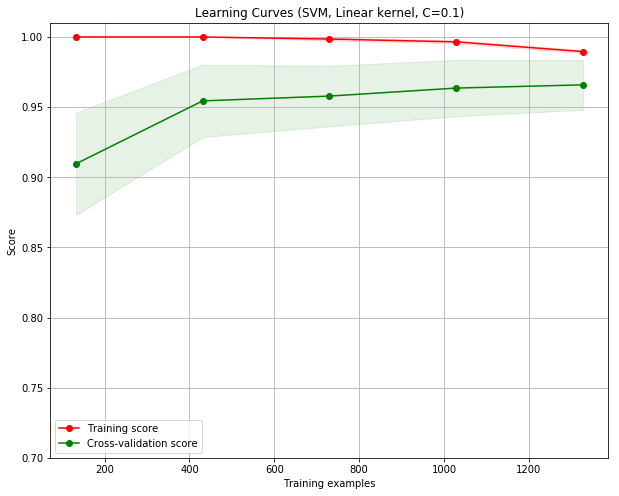

In [252]:
svc3 = SVC(C=0.1, kernel='linear', probability=True, class_weight='balanced', random_state=17)
title = "Learning Curves (SVM, Linear kernel, C=0.1)"
plot_learning_curve(svc3, title, X_train_part2, y_train2, (0.7, 1.01), cv=20, n_jobs=4)
plt.show()

Plotting training and validation curves for grid model with new features `OneVsOneClassifier` with `LogisticRegression`:

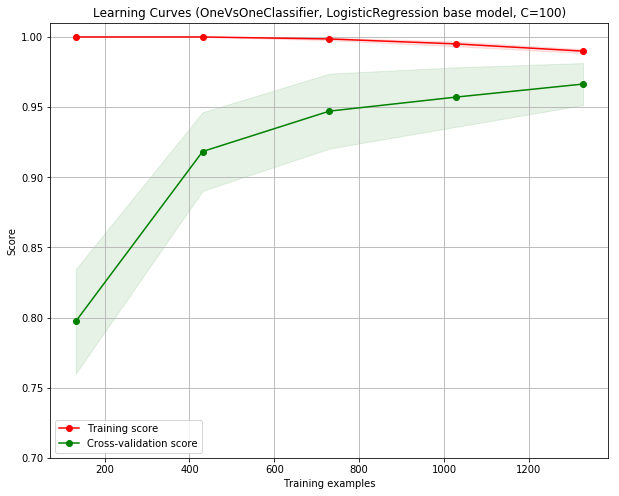

In [250]:
clf3 = OneVsOneClassifier(LogisticRegression(C=100,\
                                            class_weight='balanced', solver='newton-cg', random_state=17))
title = "Learning Curves (OneVsOneClassifier, LogisticRegression base model, C=100)"
plot_learning_curve(clf3, title, X_train_part_scaled2, y_train2, (0.7, 1.01), cv=20, n_jobs=4)
plt.show()

We see that the curves practically converge, this indicates a high quality of the forecast and if we continue to move to the right (add data to the model), we can still improve the quality of the validation.

# Part 11. Prediction for test or hold-out samples <a id='part11'></a>

Was discussed in Part 8 and Part 9

# Part 12. Conclusions <a id='part12'></a>

We had a problem with multi-class classification, and we saw that the following methods do a better job: `OneVsOneClassifier` with `LogisticRegression` and `SVC`.
We got very good score.

Now Bob knows how to evaluate phones of his own production!

Further ways to improve the solution:

- To collect additional characteristics about the components of the phone (Manufacturer, type, brand);
- Collect data about other phones;
- Make more new features;
- Combine multiple predictive models;


#  Bonus Part. Clustering <a id='bonus'></a>

## Сonsider the train sample:

Reduce the dimension while preserving the variance:

In [224]:
pca = PCA(n_components=0.9, random_state=17).fit(X2)
X_pca = pca.transform(X2)

Projections our data for the first two dimension:

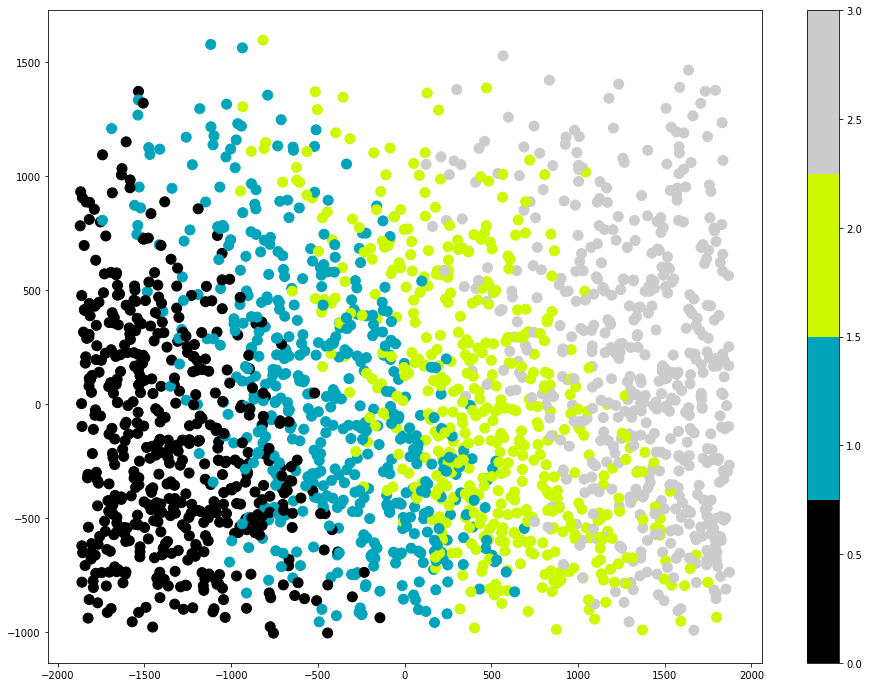

In [225]:
plt.figure(figsize=(16,12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y2, s=100, cmap=plt.cm.get_cmap('nipy_spectral', 4));
plt.colorbar();

t-SNE representation our data for the first two dimension:

Wall time: 16.7 s


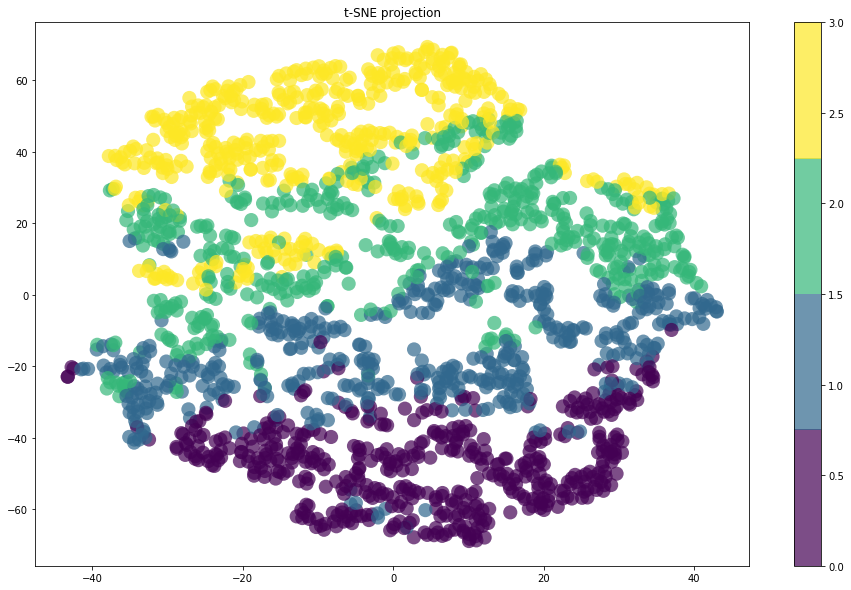

In [226]:
%%time
tsne3 = TSNE(random_state=17)

X_tsne = tsne3.fit_transform(X2)

plt.figure(figsize=(16,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y2, 
            edgecolor='none', alpha=0.7, s=200,
            cmap=plt.cm.get_cmap('viridis', 4))
plt.colorbar()
plt.title('t-SNE projection')

K-MEANS Clustering:

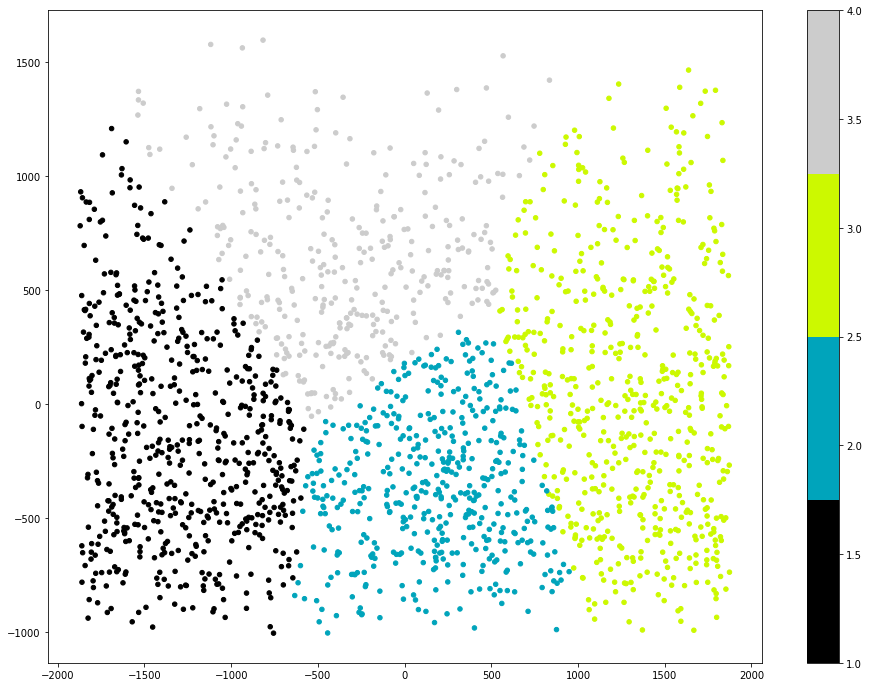

In [256]:
kmeans = KMeans(n_clusters=4,random_state=17, n_jobs=1)
kmeans.fit(X_pca)
kmeans_labels = kmeans.labels_+1
plt.figure(figsize=(16,12))
plt.scatter(X_pca[:, 0], X_pca[:, 1],\
                    c=kmeans_labels, s=20,\
                    cmap=plt.cm.get_cmap('nipy_spectral', 4));
plt.colorbar();

Confusion matrix are very bad:

In [200]:
tab = pd.crosstab(y2, kmeans_labels, margins=True)
tab.index = ['low cost', 'medium cost', 'high cost', 'very high cost', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(4)] + ['all']
tab

cluster1  cluster2  cluster3  cluster4   all
low cost             474        15         0        11   500
medium cost          109       214         0       177   500
high cost              0       234       138       128   500
very high cost         0        10       463        27   500
all                  583       473       601       343  2000

In [201]:
pd.Series(tab.iloc[:-1,:-1].max(axis=1).values / 
          tab.iloc[:-1,-1].values, index=tab.index[:-1])

low cost          0.948
medium cost       0.428
high cost         0.468
very high cost    0.926
dtype: float64

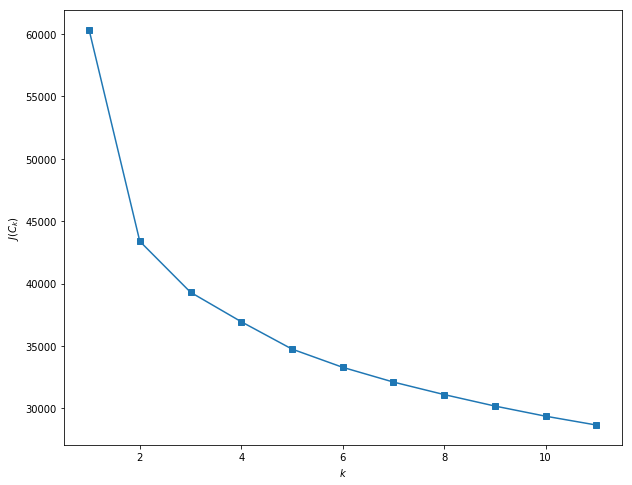

In [202]:
inertia = []
for k in tqdm_notebook(range(1, 12)):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(X2)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 12), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Agglomerative Clustering:

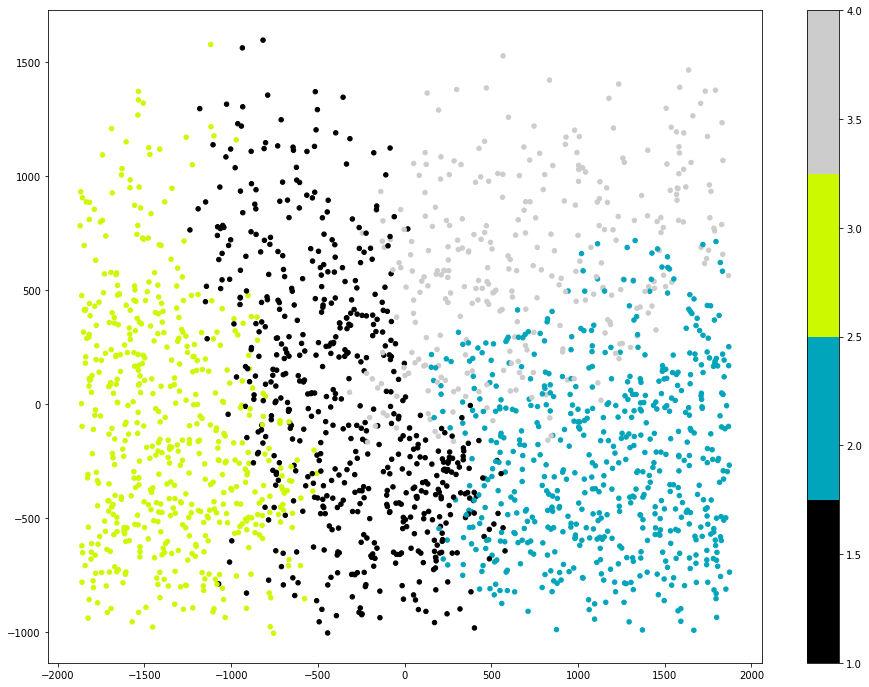

In [206]:
ag = AgglomerativeClustering(n_clusters=4, 
                             linkage='ward').fit(X_pca)
ag_labels = ag.labels_+1
plt.figure(figsize=(16,12))
plt.scatter(X_pca[:, 0], X_pca[:, 1],\
                    c=ag_labels, s=20,\
                    cmap=plt.cm.get_cmap('nipy_spectral', 4));#cmap='viridis');
plt.colorbar();

Score ARI for K-MEANS and Agglomerative Clustering:

In [207]:
adjusted_rand_score(y2, ag.labels_)

0.4729010823270623

In [763]:
adjusted_rand_score(y2, kmeans.labels_)

0.4709412765311106

Dendrogram:

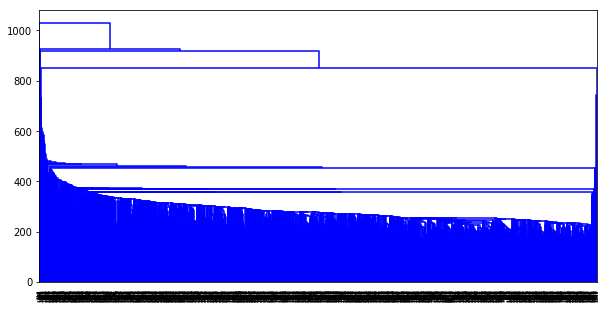

In [210]:
distance_mat = pdist(X2) # pdist calculates the upper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### A summary of the score on the train sample:

In [211]:
algorithms = []
algorithms.append(KMeans(n_clusters=4, random_state=17))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=4, random_state=17,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=4))

data = []
for algo in algorithms:
    algo.fit(X_pca)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y2, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y2, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y2, algo.labels_),
        'Completeness': metrics.completeness_score(y2, algo.labels_),
        'V-measure': metrics.v_measure_score(y2, algo.labels_),
        'Silhouette': metrics.silhouette_score(X_pca, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

ARI       AMI  Homogenity  Completeness  V-measure  \
K-means        0.470941  0.501752    0.502562      0.510776   0.506636   
Affinity       0.074406  0.258462    0.779738      0.266829   0.397599   
Spectral       0.394046  0.433886    0.434807      0.436107   0.435456   
Agglomerative  0.472901  0.525005    0.525778      0.535837   0.530760   

               Silhouette  
K-means          0.293893  
Affinity         0.239835  
Spectral         0.281738  
Agglomerative    0.228466

## Сonsider the test sample:

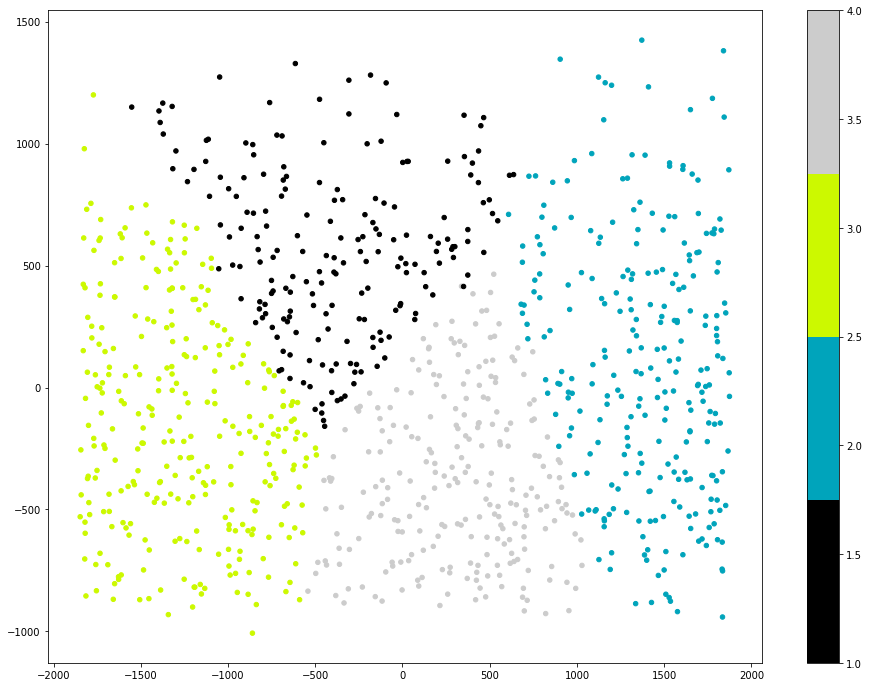

In [212]:
X3 = data_test
pca3 = PCA(n_components=0.9, random_state=17).fit(X3)
X_pca3 = pca3.transform(X3)
kmeans = KMeans(n_clusters=4,random_state=17, n_jobs=1)
kmeans.fit(X_pca3)
kmeans_labels = kmeans.labels_+1
plt.figure(figsize=(16,12))
plt.scatter(X_pca3[:, 0], X_pca3[:, 1],\
                    c=kmeans_labels, s=20,\
                    cmap=plt.cm.get_cmap('nipy_spectral', 4));#cmap='viridis');
plt.colorbar();

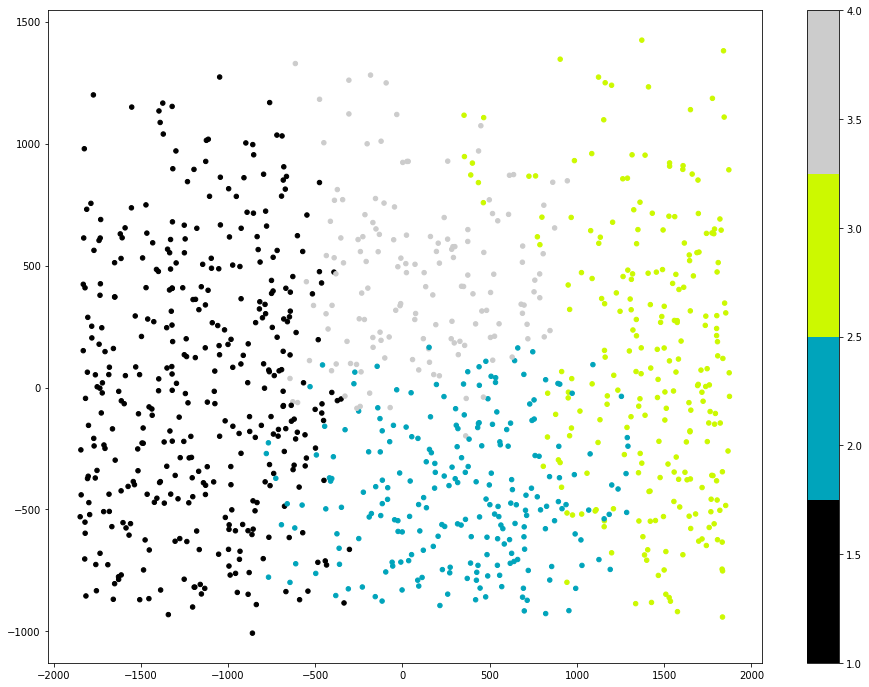

In [213]:
ag = AgglomerativeClustering(n_clusters=4, 
                             linkage='ward').fit(X_pca3)
ag_labels = ag.labels_+1
plt.figure(figsize=(16,12))
plt.scatter(X_pca3[:, 0], X_pca3[:, 1],\
                    c=ag_labels, s=20,\
                    cmap=plt.cm.get_cmap('nipy_spectral', 4));#cmap='viridis');
plt.colorbar();

### We can only evaluate with silhouette:

In [214]:
metrics.silhouette_score(X_pca3, ag_labels)

0.2648483558947686

In [215]:
metrics.silhouette_score(X_pca3, kmeans_labels)

0.28787864110002565